# Playground for Clustering Eval Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA

In [1]:
import datetime
print(datetime.datetime.now())

2020-11-04 08:06:14.327779


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Generate in Data

In [104]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a
a.shape

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

(3, 4)

In [205]:
from sklearn.datasets import make_blobs

#X, y = make_blobs(n_samples=50, 
#                  n_features=2, 
#                  centers=[[-1, 1], [1, 1], [0, 0]], 
#                  cluster_std=0.2, 
#                  random_state=39)

X.shape

X = np.array([
# Top left
[102,33],
[109,73],
[111,30],
[103,97],
    

# Top middle
[119,56],
[131,89],
[234,82],
[238,71],
    
# Top right
[248,53],
[266,49],
[257,61],
[272,79],
[255,90],
    
# Bottom left
[177,178],
[206,209],
[201,185],
[196,156],
    
# Bottom right
[220,175],
[224,158],

])

badlabels=[0,0,0,0, 1,1,1,1, 2,2,2,2,2, 3,3,3,3, 4,4]
len(badlabels)

X[:,0] = X[:,0] - 90 
#X

(19, 2)

19

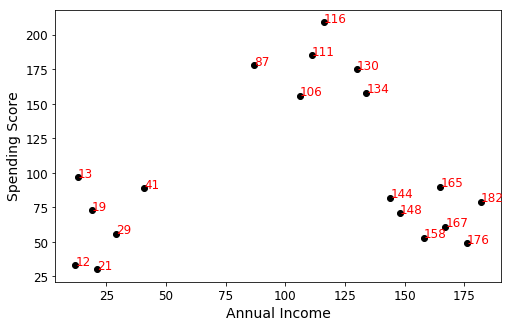

In [206]:
plt.figure();



plt.grid();
plt.scatter(X[:, 0], X[:, 1], c="black");
#plt.title("Mall Data");
plt.xlabel('Annual Income');
plt.ylabel('Spending Score');
for x, y in zip(X[:, 0], X[:, 1]):
    plt.text(x, y, str(x), color="red", fontsize=12)

plt.xticks();
plt.yticks();

In [226]:
def do_plot(X, labels, title, filename=None):

    sil = silhouette_score(X, labels,  metric='euclidean')
    ch = calinski_harabasz_score(X, labels)
    
    fig, ax = plt.subplots(figsize=(6, 4));  

    ax.axhline(y=0, color='k');
    ax.axvline(x=0, color='k');
    ax.grid(True, which='both');
    #ax.set_aspect('auto')
    #ax.set_xlim(xlim);
    #ax.set_ylim(ylim);
    ax.tick_params(axis='both', which='major', labelsize=16);

    #plt.figure();
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=300)
    plt.title("{}: CH={:.2f}, Silh={:.2f}".format(title, ch, sil), fontsize=20);
    #plt.xlabel('Annual Income (K)');
    #plt.ylabel('Spending Score');
    if filename:
        plt.savefig('out/'+filename+'.png'.format(k))
    plt.show()
    
    return ch, sil

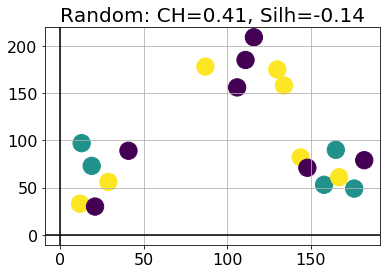

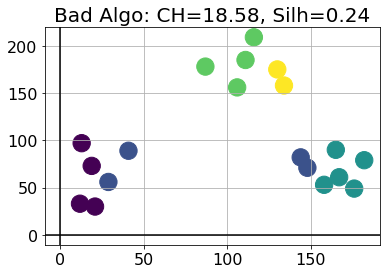

KMeans(n_clusters=3, random_state=42)

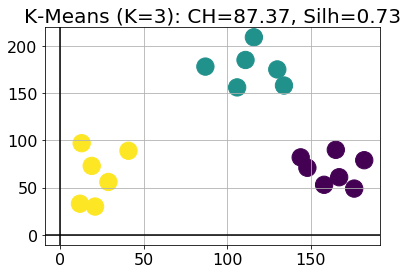

KMeans(n_clusters=6, random_state=42)

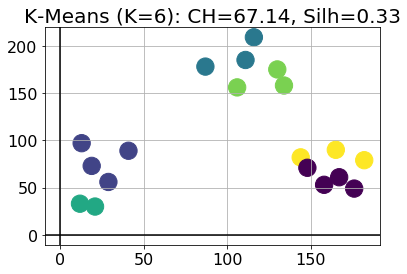

In [227]:
np.random.seed(49)
_, _ = do_plot(X, np.random.randint(3, size=X.shape[0]), title="Random", filename='cluster_random')

_, _ = do_plot(X, badlabels, title="Bad Algo", filename='cluster_bad')


k_means = KMeans(init='k-means++', n_clusters=3, n_init=10, random_state=42)
k_means.fit(X)
_, _ = do_plot(X, k_means.labels_, title="K-Means (K=3)", filename='cluster_k3')

k_means = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=42)
k_means.fit(X)
_, _ = do_plot(X, k_means.labels_, title="K-Means (K=6)", filename='cluster_k6')
    

## Hyperparameter Tuning

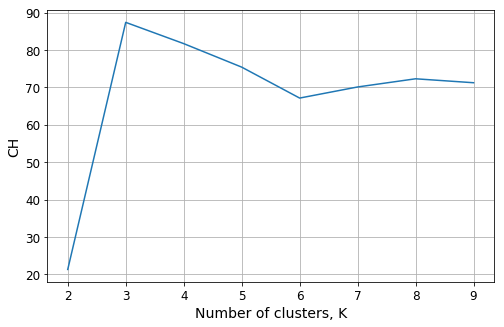

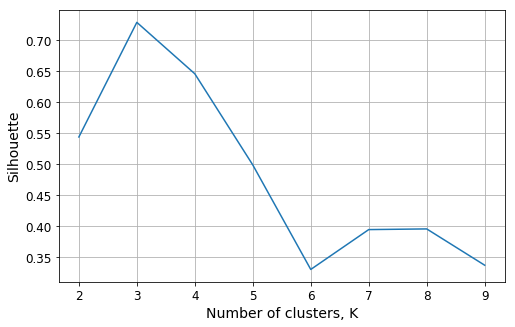

In [232]:
chs = {}
silhouettes = {}
        
for k in range(2, 10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)
    sil = silhouette_score(X, k_means.labels_,  metric='euclidean')
    ch = calinski_harabasz_score(X, k_means.labels_)
    chs[k] = ch
    silhouettes[k] = sil
    
    
plt.figure();
plt.plot(list(chs.keys()), list(chs.values()));
#plt.title('K-Means')
plt.xlabel("Number of clusters, K");
plt.ylabel("CH");
plt.savefig('out/elbow_ch.png');
plt.show();


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
#plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('out/elbow_sil.png');
plt.show();